# National Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#Importing the CSVs
nyc_file = "../New York/violent_crime_df_ny.csv"
la_file = "../Los Angeles/LA_Violent_Crime.csv"
tampa_file = "../Tampa/Tampa_violent_crime.csv"
chicago_file = "../Chicago/Chicago_Violent_Crime.csv"
dc_file = "../DC_Crime/DC_Violent_Crime.csv"
US_file = "FBI_US_Crime_Averages.csv"

nyc_data = pd.read_csv(nyc_file)
la_data = pd.read_csv(la_file)
tampa_data = pd.read_csv(tampa_file)
chicago_data = pd.read_csv(chicago_file)
dc_data = pd.read_csv(dc_file)

US_data = pd.read_csv(US_file)
US_data.columns.values

array(['Year', 'Population1', 'Violent\ncrime2',
       'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(revised \ndefinition)3',
       'Rape\n(revised \ndefinition) \nrate3',
       'Rape\n(legacy \ndefinition)4',
       'Rape\n(legacy \ndefinition) \nrate4', 'Robbery',
       'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ',
       'Motor \nvehicle \ntheft', 'Motor \nvehicle \ntheft \nrate ',
       'Unnamed: 22', 'Unnamed: 23'], dtype=object)

In [20]:
#Clean up FBI US Data
US_data = US_data.rename(columns = {'Violent \ncrime \nrate ': 'value_US', 'Year': 'year'})
US_data = US_data[['year', 'value_US']]

In [32]:
la_data

,Unnamed: 0,year,crime_type,value,variable
0,0,2006,Violent crime,786.863103,rate
1,1,2007,Violent crime,718.410887,rate
2,2,2008,Violent crime,689.523542,rate
3,3,2009,Violent crime,625.393632,rate
4,4,2010,Violent crime,559.230571,rate
5,5,2011,Violent crime,522.385162,rate
6,6,2012,Violent crime,481.100209,rate
7,7,2013,Violent crime,426.016281,rate
8,8,2014,Violent crime,490.712025,rate
9,9,2015,Violent crime,634.815529,rate


In [35]:
#Merge the dataframes using only the appropriate years
national_data = pd.merge(nyc_data, la_data, on='year', how='outer', suffixes=('_NYC', '_LA'))

national_data = pd.merge(national_data, chicago_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Chi'})

national_data = pd.merge(national_data, tampa_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Tamp'})

dc_data = dc_data.rename(columns={'Year': 'year'})
national_data = pd.merge(national_data, dc_data, on='year', how='outer')
national_data = national_data.rename(columns = {'Violent Crime Rate': 'value_DC'})

national_data = national_data[['year', 'value_NYC', 'value_LA', 'value_Chi', 'value_Tamp', 'value_DC']]

national_data = national_data.rename(columns = {'value_NYC': 'New York City', 'value_LA': 'Los Angeles', 'value_Chi': 'Chicago', 
                                                'value_Tamp': 'Tampa', 'value_DC': 'Washington D.C.'})

national_data = pd.merge(national_data, US_data, on='year', how='left')
national_data = national_data.rename(columns = {'value_US': 'U.S. Average'})

#national_data.plot(kind='line', x='year', figsize=(15,10))
national_data.to_csv('Comparative_Crime_Data.csv')

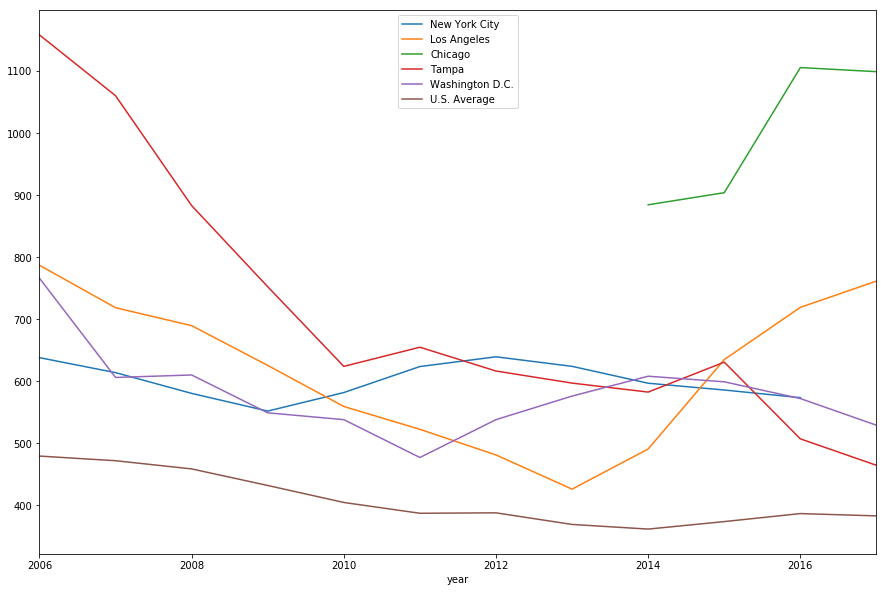

In [36]:
national_data.plot(kind='line', x = 'year', figsize = (15,10))